## Regularized Logistic Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import copy
import math
%matplotlib inline

In [2]:
def load_data(filepath):
    data = np.loadtxt(filepath, delimiter=',')
    X = data[:,:2]
    Y = data[:,2]
    return X,Y

In [3]:
X_train, y_train = load_data("data/microchips.txt")

In [4]:
print("Shape of X_train: ", X_train.shape)
print("Shape of y_train: ", y_train.shape)

Shape of X_train:  (118, 2)
Shape of y_train:  (118,)


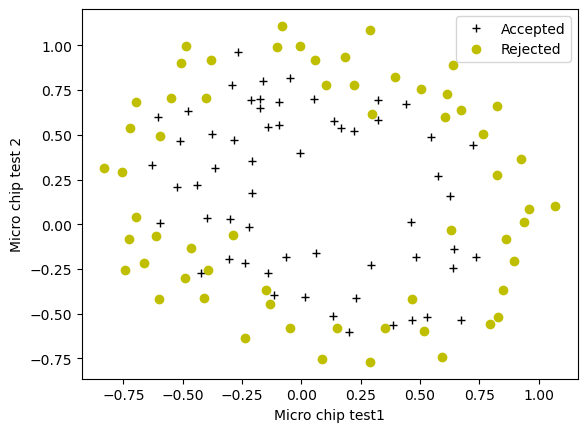

In [5]:
acc = y_train == 1
rej = y_train == 0

plt.plot(X_train[acc, 0], X_train[acc, 1], 'k+', label='Accepted')
plt.plot(X_train[rej, 0], X_train[rej, 1], 'yo', label='Rejected')

plt.ylabel('Micro chip test 2')
plt.xlabel('Micro chip test1')

plt.legend(loc='upper right')

plt.show()

In [6]:
# Feature mapping function to polynomial features 
def map_features(X1, X2):
    X1 = np.atleast_1d(X1)
    X2 = np.atleast_1d(X2)
    degree = 6
    out = []
    for i in range(1, degree+1):
        for j in range(i+1):
            out.append((X1**(i-j)) * (X2**(j)))
    return np.stack(out, axis=1)

In [7]:
print("Initial shape: ", X_train.shape)
mapped_features = map_features(X_train[:,0], X_train[:,1])
print("Shape after feature mapping: ", mapped_features.shape)

Initial shape:  (118, 2)
Shape after feature mapping:  (118, 27)


In [8]:
# sigmoid function
# 'z' here is a numpy array of any size
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [9]:
def cost_function(x, y, w, b):
    m,n = x.shape
    cost = 0
    for i in range(m):
        z = np.dot(x[i], w) + b
        f_wb = sigmoid(z)
        cost += -y[i]*np.log(f_wb) - (1 - y[i])*np.log(1 - f_wb)
    return cost/m

In [10]:
def regularized_cost_func(X, y, w, b, lambda_ = 1):
    m,n = X.shape
    cost_without_reg = cost_function(X, y, w, b)
    reg_cost = 0
    reg_cost = sum(np.square(w))
    total_cost = cost_without_reg + (lambda_/(2*m)) * reg_cost

    return total_cost

In [11]:
# Compute gradient for 1 iteration over all training examples
def calculate_gradient(x, y, w, b):
    m,n = x.shape
    dj_dw = np.zeros(w.shape)
    dj_db = 0
    for i in range(m):
        f_wb_i = sigmoid(np.dot(x[i], w) + b)
        err_i = f_wb_i - y[i]
        for j in range(n):
            dj_dw[j] = dj_dw[j] + err_i * x[i, j]
        dj_db = dj_db + err_i
    dj_dw /= m
    dj_db /= m

    return dj_dw, dj_db

In [12]:
def calc_gradient_reg(X, y, w, b, lambda_ = 1):
    m,n = X.shape
    dj_dw, dj_db = calculate_gradient(X, y, w, b)

    for j in range(n):
        dj_dw[j] = dj_dw[j] + (lambda_/m) * w[j]

    return dj_dw, dj_db

In [13]:
def gradient_descent(x, y, w, b, alpha, itrs, lambda_ = 1):
    m = x.shape[0]
    J_track = []
    w_track = []
    for i in range(itrs):
        dj_dw, dj_db = calc_gradient_reg(x, y, w, b, lambda_)
        w -= alpha * dj_dw
        b -= alpha * dj_db

        if i<100000:
            cost = regularized_cost_func(x, y, w, b, lambda_)
            J_track.append(cost)

        if i%math.ceil(itrs/10) == 0 or i ==(itrs - 1):
            w_track.append(w)
            print(f"Iteration {i:4}: Cost {float(J_track[-1]):8.2f}")
    return w,b, J_track, w_track

In [14]:
np.random.seed(1)
w_init = np.random.rand(mapped_features.shape[1]) -0.5
b_init = 1
lambda_ = 0.01
itrs = 10000
alpha = 0.01
w,b, j_track, _ = gradient_descent(mapped_features, y_train, w_init, b_init, alpha, itrs, lambda_)

Iteration    0: Cost     0.72


Iteration 1000: Cost     0.59
Iteration 2000: Cost     0.56
Iteration 3000: Cost     0.53
Iteration 4000: Cost     0.51
Iteration 5000: Cost     0.50
Iteration 6000: Cost     0.48
Iteration 7000: Cost     0.47
Iteration 8000: Cost     0.46
Iteration 9000: Cost     0.45
Iteration 9999: Cost     0.45


In [15]:
def predict(x,w,b):
    m,n = x.shape
    pr = np.zeros(m)
    for i in range(m):
        z_wb = np.dot(x[i],w) + b
        f_wb = sigmoid(z_wb)
        pr[i] = 1 if f_wb > 0.5 else 0

    return pr

In [16]:
predictions = predict(mapped_features, w, b)
print('Train Accuracy: %f'%(np.mean(predictions == y_train) * 100))

Train Accuracy: 82.203390
